In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
from googletrans import Translator

### **How to become a super host**



In [ ]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data
list = pd.read_csv('listings.csv')
features_df = list.copy()

In [ ]:
# check the data type of the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # show all contents in a series
    print(list.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [ ]:
#Drop id and other columns unrelated to the business questions
list = list.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about','host_thumbnail_url','host_picture_url', 'host_neighbourhood', 
       'host_total_listings_count', 'host_verifications','host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street','neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'amenities', 
       'security_deposit','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated','calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review','requires_license',
       'license', 'jurisdiction_names','instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'], axis=1)

In [ ]:
#filter data to view characteristics of a super host
list[list.host_is_superhost== 't']

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,accommodates,bathrooms,bedrooms,beds,bed_type,...,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,within a few hours,100%,88%,t,Roslindale,2,1.0,1.0,1.0,Real Bed,...,46,61,319,98.0,10.0,9.0,10.0,10.0,9.0,10.0
4,within an hour,100%,100%,t,Roslindale,2,1.5,1.0,2.0,Real Bed,...,34,59,334,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,within a few hours,100%,95%,t,Roslindale,2,1.0,1.0,1.0,Real Bed,...,28,58,58,100.0,10.0,10.0,10.0,10.0,9.0,10.0
7,within a few hours,100%,100%,t,Roslindale,2,2.0,1.0,1.0,Real Bed,...,60,90,365,96.0,10.0,10.0,10.0,10.0,10.0,10.0
8,within an hour,100%,100%,t,Roslindale,2,1.0,1.0,2.0,Real Bed,...,42,72,347,96.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,within an hour,100%,100%,t,Allston-Brighton,2,1.0,1.0,1.0,Real Bed,...,0,0,14,98.0,10.0,10.0,10.0,10.0,10.0,10.0
3496,within a day,100%,77%,t,Allston-Brighton,2,1.0,1.0,1.0,Real Bed,...,39,69,69,95.0,10.0,10.0,10.0,10.0,10.0,9.0
3497,within an hour,100%,95%,t,Allston-Brighton,2,2.0,1.0,1.0,Real Bed,...,0,0,256,91.0,9.0,9.0,9.0,9.0,9.0,9.0
3501,within an hour,100%,95%,t,Allston-Brighton,2,2.0,1.0,1.0,Real Bed,...,9,38,313,90.0,9.0,9.0,10.0,10.0,9.0,9.0


In [ ]:
#Create a list of columns that are related to examining the requirements for a superhost
SuperHost_req= list[['host_response_rate', 'host_acceptance_rate', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [ ]:
#calculate the descriptive statistics for superhost requirement
SuperHost_req.describe()

,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3585.00000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,8.64993,21.833194,38.558159,179.346444,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,10.43533,21.860966,33.158272,142.136180,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,0.00000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,0.00000,0.000000,0.000000,19.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,4.00000,16.000000,37.000000,179.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,15.00000,40.000000,68.000000,325.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,30.00000,60.000000,90.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


The data suggests the following criteria for becoming a superhost:

Host guests for 179 days a year on average

On average, maintain a 95% response rate

Have an average of 92% 5-star reviews

Honor confirmed reservations 84% of the time

Have a guest rating of 9.7 for check-in and communication

Have a guest rating of 9.3 for cleanliness

Have a guest rating of 9.4 for accuracy and location

Have a guest rating of 9.2 for value




---






In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# **Problem formulation:**


Problem: For rental platforms like Airbnb, data about the online behavior of their customers is probably the most important business asset. Through behavioral data analysis, platforms can extract deeper consumer information and present a more personalized experience to these customers. To enhance its competitiveness, a strong customer analytics is necessary for Airbnb to gaudging the health of the business. In this project, customer preference analysis is conducted to improve Airbnb's marketing decisions such as advertisements, recommendations and promotions.

1. Objective: To analyze the preferences of customers, and quantify the importantance of the preferences to improve Airbnbs's marketing decisions. 

2. Input: Factors which involve the preferences of customers  

3. Output: The model which predicts the book rate, and the importance of the factors in the model.
   
4. Evaluation methods: MSE score and R2 score.  

# **Before constructing the model, some analysis is conducted by descriptiving the data in the dataset** 

## **`1. Analyze the price prefered by customers**

In [3]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df.head()

# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)
reviews_df = reviews_df.dropna()
reviews_df.info()
reviews_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68222 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68222 non-null  int64         
 1   id             68222 non-null  int64         
 2   date           68222 non-null  datetime64[ns]
 3   reviewer_id    68222 non-null  int64         
 4   reviewer_name  68222 non-null  object        
 5   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.6+ MB


listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Text(0, 0.5, 'Number of reviews')

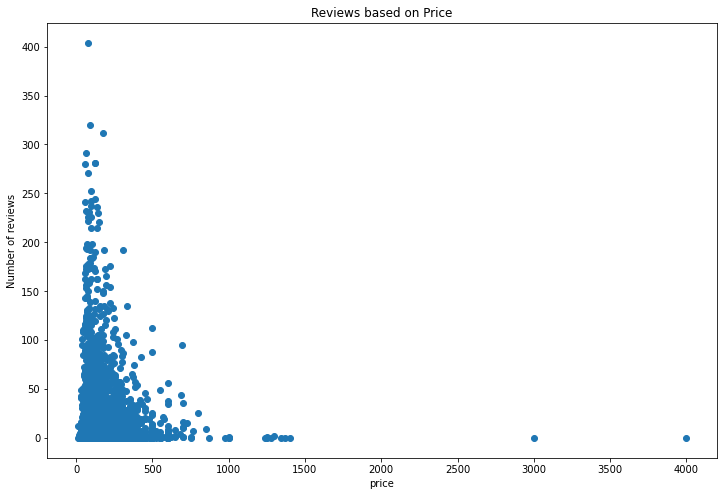

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

**Discussion:** The above graph shows that listings with prices that range around 100-400 get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up. This indicates that customers prefer to the listing with price around 100-400.

## **`2. Analyze the season and day prefered by customers**

Text(0, 0.5, 'Number')

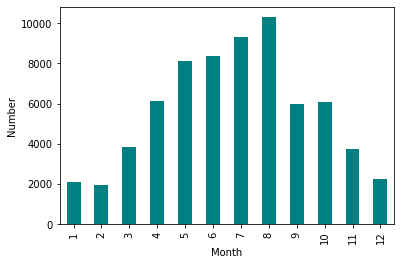

In [6]:
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
 
n_reviews_month = reviews_df.groupby('month').size()
n_reviews_month.plot(kind='bar',color='teal');
plt.xlabel('Month')
plt.ylabel('Number')

In [7]:
calendar = pd.read_csv('calendar.csv')

In [9]:
from pandas.api.types import CategoricalDtype

def sort_week_day(days):
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    cat_type = CategoricalDtype(categories=cats, ordered=True)
    week_day_sorted = pd.to_datetime(days[calendar.available == 'f']).dt.day_name().astype(cat_type)
    return week_day_sorted
    
only_dates = sort_week_day(calendar.date)
only_dates.value_counts()

Tuesday      96726
Friday       95474
Saturday     95404
Thursday     95270
Wednesday    94656
Sunday       94264
Monday       94059
Name: date, dtype: int64

Text(0, 0.5, 'Not available places')

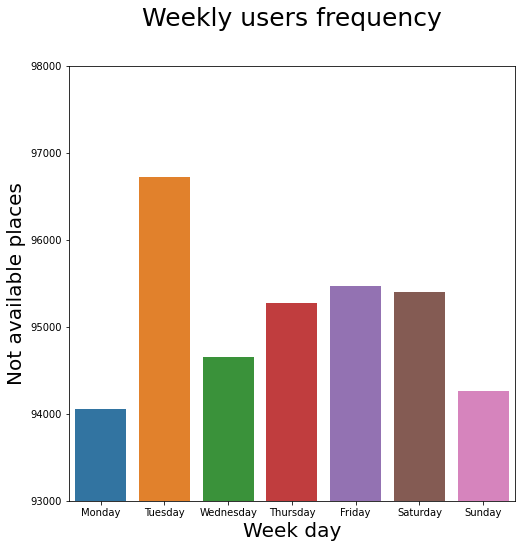

In [58]:
plt.figure(figsize=(8, 8))
sample_plot = sns.barplot(x=only_dates.value_counts().index, y=only_dates.value_counts())
sample_plot.set(ylim=(93000, 98000))
sample_plot.axes.set_title("Weekly users frequency", fontsize=25, pad=40)
sample_plot.set_xlabel("Week day",fontsize=20)
sample_plot.set_ylabel("Not available places",fontsize=20)

**Discussion:** The above graph shows that August and Tuesday have most reviews. This indicates that customers prefer to travel in August the on Tuesday.

## **`3. Analyze the kind of listing prefered by customers**

In [14]:
#load the data
list = pd.read_csv('listings.csv')
features_df = list.copy()
features_df.review_scores_rating.unique()

array([ nan,  94.,  98., 100.,  99.,  90.,  96.,  80.,  97.,  91.,  95.,
        88.,  92.,  87.,  93.,  73.,  82.,  20.,  89.,  81.,  78.,  74.,
        60.,  86.,  85.,  75.,  79.,  70.,  83.,  64.,  84.,  40.,  68.,
        67.,  48.,  58.,  62.,  76.,  77.,  71.,  65.,  53.,  47.,  72.,
        46.,  50.,  66.,  69.,  55.])

In [15]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [16]:
ratings_per_neighbourhood = features_df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [17]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type  
Downtown                Boat               100.0
Brighton                Loft               100.0
Charlestown             Entire Floor       100.0
Bay Village             Townhouse          100.0
                        Guesthouse         100.0
                                           ...  
Fenway                  Bed & Breakfast      NaN
Jamaica Plain           Entire Floor         NaN
Longwood Medical Area   Loft                 NaN
Roxbury                 Entire Floor         NaN
                        Loft                 NaN
Name: review_scores_rating, Length: 132, dtype: float64

In [22]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()
ratings_per_neighbourhood_type = features_df.groupby('neighbourhood_cleansed').review_scores_rating.mean()

In [26]:
ratings_per_property_type = ratings_per_property_type.dropna()
ratings_per_property_type

property_type
Apartment           91.514141
Bed & Breakfast     91.800000
Boat                91.454545
Condominium         94.451977
Dorm                86.500000
Entire Floor       100.000000
Guesthouse         100.000000
House               92.204593
Loft                96.312500
Other               88.111111
Townhouse           94.760870
Villa               99.500000
Name: review_scores_rating, dtype: float64

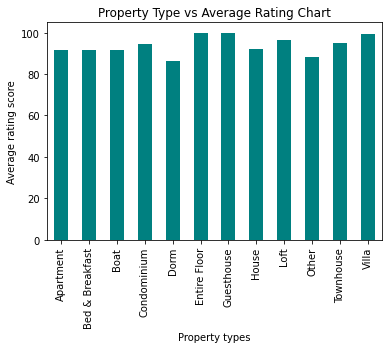

In [27]:
ratings_per_property_type.plot(kind='bar',color='teal');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');

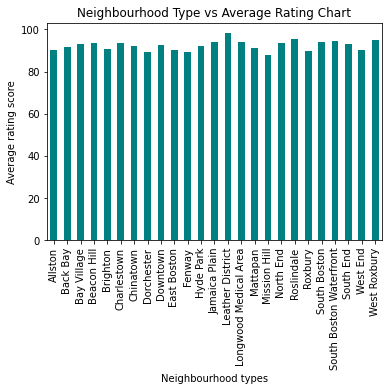

In [28]:
ratings_per_neighbourhood_type.plot(kind='bar',color='teal');
plt.xlabel('Neighbourhood types')
plt.ylabel('Average rating score')
plt.title('Neighbourhood Type vs Average Rating Chart');

Text(0.5, 1.0, 'Reviews based on neighbourhood and property type')

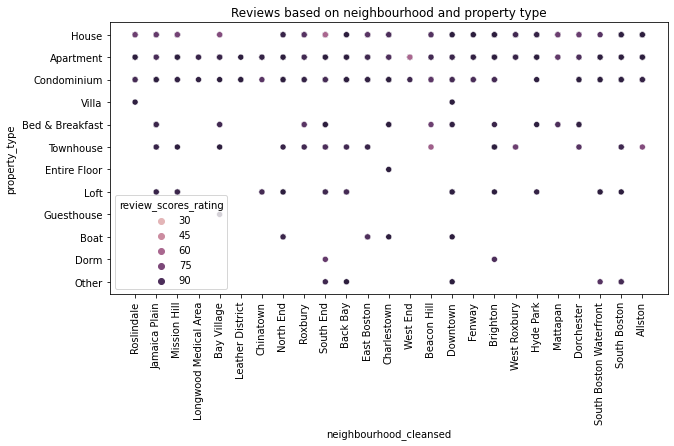

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features_df)
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and property type')

**Discussion:** The above graphs show that "Entire Floor" and "Guesthouse" and listings in Longwood Medical Area got the highest rating, probably because they give customers the best experience. This indicates that the kind of listings that customers prefer to rent.



---



Now that we've analyzed multiple aspects of customer preferences. However, there are still some features which indicate the uesr preference, but human cannot detect them in the data, so we can employ machine learning techniques.

User preference can be represented by the book rate quantitatively, so a model regarding to book rate can be introduced to predict user preference. For the book rate model, the response variable is the availibaility_365, the total number of day available in one year.The book rate can simply converted by: 1-availibaility_365/365.

# **Data preparation and preprocessing pipeline**

## **Data cleaning**

In [31]:
listings = pd.read_csv('listings.csv', delimiter = ',')

In [38]:
# keep the features which involve the decisions of customers
cols = ['id', 'host_id', 'host_since', 'last_scraped', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_is_superhost', \
             'host_identity_verified', 'neighbourhood_cleansed', 'city', 'neighbourhood_group_cleansed', \
             'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', \
             'bedrooms', 'beds', 'bed_type', 'square_feet', 'price', 'weekly_price', \
             'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', \
             'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', \
             'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
             'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'requires_license', \
             'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
             'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']
cleaned_list = listings[cols]

In [39]:
# drop high-NaN columns
cleaned_list = cleaned_list.drop(labels = ['license', 'square_feet', 'monthly_price', 'weekly_price', \
                                           'has_availability', 'neighbourhood_group_cleansed'], axis = 1)

In [41]:
def parse_dollar(x):

    if x is np.nan:
        return 0
    elif isinstance(x, str):
        return float(x[1:-3].replace(",", ""))
    else:
        return x

def parse_percentage(x):

    if isinstance(x, str):
        return float(x[0:-1])
    else:
        return x

# formatting from string to the correct format
cleaned_list['security_deposit'] = cleaned_list['security_deposit'].apply(parse_dollar)
cleaned_list['cleaning_fee'] = cleaned_list['cleaning_fee'].apply(parse_dollar)
cleaned_list['price'] = cleaned_list['price'].apply(parse_dollar)
cleaned_list['extra_people'] = cleaned_list['extra_people'].apply(parse_dollar)
cleaned_list['host_response_rate'] = cleaned_list['host_response_rate'].apply(parse_percentage)
cleaned_list['host_acceptance_rate'] = cleaned_list['host_acceptance_rate'].apply(parse_percentage)
cleaned_list['last_scraped'] = pd.to_datetime(cleaned_list['last_scraped'])
cleaned_list['host_since'] = pd.to_datetime(cleaned_list['host_since'])

Text(0, 0.5, 'Row Count')

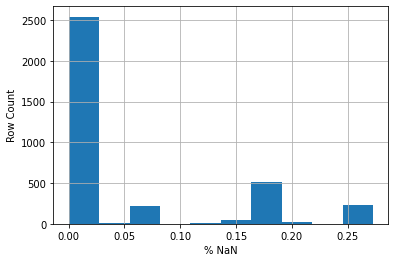

In [42]:
# create a column to flag if the row contain any NaN value
cleaned_list['has_NaN'] = (cleaned_list.isnull().sum(axis = 1)/cleaned_list.shape[1]) > 0
# plot NaN distribution
nan_rows = (cleaned_list.isnull().sum(axis = 1)/cleaned_list.shape[1]).sort_values(ascending = False)
ax = nan_rows.hist()
ax.set_xlabel("% NaN")
ax.set_ylabel("Row Count")

In [44]:
# drop data containing any missing values
dropped_list = cleaned_list.iloc[nan_rows[(nan_rows==0)].index.tolist(), :].reset_index(drop = True)
nan_list = cleaned_list.iloc[nan_rows[(nan_rows>0)].index.tolist(), :].reset_index(drop = True)
print("All data with any missing value has been dropped")

All data with any missing value has been dropped


In [46]:
# replace missing values with the most frequent value in the column

def impute_mode(df, variable):

    # find most frequent category
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    
    # replace NA
    df[variable].fillna(most_frequent_category, inplace=True)
    
impute_cols = cleaned_list.columns[cleaned_list.isnull().any()]
for col in impute_cols:
    impute_mode(cleaned_list, col)

In [47]:
# convert the availability to booking rate
cleaned_list['booked_365'] = cleaned_list['availability_365'].apply(lambda x: (365 - x)/365*100)

from datetime import datetime

# calculate the day difference based the two dates: host_since and last_scrape
def day_diff(df):
    
    if ('last_scraped' in df.columns) & ('host_since' in df.columns):
        df['host_days'] = (pd.to_datetime(df['last_scraped']) - pd.to_datetime(df['host_since'])).apply(lambda x: x.days)
    else:
        print('Error: Date column does not exist in the dataset!')
        
# return day of the week based on the date provide       
def date2day(x):
    
    if isinstance(x, datetime):
        return x.isoweekday()
    else:
        return x

    
day_diff(cleaned_list)

# # convert date to day
# cleaned_list['day'] = cleaned_list.last_scraped.apply(date2day)

# drop unnecessary columns in modeling the host booking rate
feature_to_drop = ['id', 'host_id', 'latitude', 'longitude', 'city', \
                   'host_since', 'last_scraped', 'first_review', 'requires_license', 'availability_365']
processed_list = cleaned_list.drop(labels = feature_to_drop, axis = 1)

In [48]:
# Convert host_response_time to integer numbers
def engineer_host_response_time(x):

    if x == 'within an hour':
        return 1
    elif x == 'within a few hours':
        return 2
    elif x == 'within a day':
        return 3
    elif x == 'a few days or more':
        return 4
    else:
        return x

# Convert cacellation_policy to ordinal number    
def engineer_cancellation_policy(x):

    if x == 'flexible':
        return 1
    elif x == 'moderate':
        return 2
    elif x == 'strict':
        return 3
    elif x == 'super_strict_30':
        return 4
    else:
        return x


processed_list.host_response_time = processed_list.host_response_time.apply(engineer_host_response_time)
processed_list.cancellation_policy = processed_list.cancellation_policy.apply(engineer_cancellation_policy)

In [49]:
# convert string 't' and 'f' to 1 and 0
def encode_binary(x):
    
    if x == 'f':
        return 0
    elif x == 't':
        return 1
    else:
        return x

processed_list.host_is_superhost = processed_list.host_is_superhost.apply(encode_binary)
processed_list.host_identity_verified = processed_list.host_identity_verified.apply(encode_binary)
processed_list.instant_bookable = processed_list.instant_bookable.apply(encode_binary)
processed_list.require_guest_profile_picture = processed_list.require_guest_profile_picture.apply(encode_binary)
processed_list.require_guest_phone_verification = processed_list.require_guest_phone_verification.apply(encode_binary)

## **Data preprocessing**

In [50]:
cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']
processed_list = pd.get_dummies(data = processed_list, columns = cat_features)

# **Model description**

Based on previous work, Random Forest Clssifier is best in training the model, but the parameters are difficult to choose. In order to select the appropriate parameters, GridSearch() is defined to find the optimal parameters automatically First, we define these models and obtain them from sklearn.
Here is the description for Random Forest Classifier:   
* <b>RandomForestClassifier</b>     
This is an integrated learning method that works by training multiple decision trees on a training set and then combining their predictions to produce a final prediction. Random forests usually perform well on high-dimensional datasets and can handle non-linear relationships well.   

In [ ]:
def GridSearch(X_train, X_test, y_train, y_test, criterion = ['mse'], n_estimators = [300, 600],
                  method = 'GBDT', learning_rate = 0.5, validate = False, cv = 5,
                  max_features = ['auto'], max_depth = [10, 20, 40], min_samples_leaf = [2,4], n_jobs = -1):
    '''
    Usage: use gridsearch to find optimal parameters for the random forest (RF) regressor.
    Input: training and testing sets from X and y variables
    Output: the best regressor
    '''
       
    clf = RandomForestRegressor(random_state=42, n_jobs = n_jobs)
        
    parameters = {'criterion': criterion,
                  'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_leaf':min_samples_leaf,
                  'max_features':max_features
                 }
    
    #Use gridsearch to find the best-model parameters.
    grid_obj = GridSearchCV(clf, parameters, cv = cv)
    grid_fit = grid_obj.fit(X_train, y_train)
    
    #obtaining best model, fit it to training set
    best_clf = grid_fit.best_estimator_
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    print('The training MSE Score is', mean_squared_error(y_train, best_train_predictions))
    print('The training R2 Score is', r2_score(y_train, best_train_predictions))
    
    if validate:
        best_test_predictions = best_clf.predict(X_test)
        print('The testing MSE Score is', mean_squared_error(y_test, best_test_predictions))
        print('The testing R2 Score is', r2_score(y_test, best_test_predictions))
    return best_clf

# **Experiments**

## **1. Define the model**

In [ ]:
# select features used for modeling
data = processed_list.copy()
drop_cols = ['reviews_per_month', 'calculated_host_listings_count','review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_value']

data.drop(labels = drop_cols, axis = 1, inplace = True)

## apply feature scaling
scaler = StandardScaler()
data_transformed = pd.DataFrame(data = scaler.fit_transform(data), index = data.index, columns = data.columns)
X_transformed = data_transformed.drop(labels = ['booked_365'], axis = 1)
y_transformed = data_transformed[['booked_365']].iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size = 0.3, random_state = 42)

criterion = ['squared_error']
method = 'RF' 
n_estimators =  [200, 400]
max_features = [30, 50, 70] 
max_depth = [10, 20, 40] 
min_samples_leaf = [2,4]
learning_rate = 0.001

# **2. Get the best model**

In [56]:

best_clf = GridSearch(X_train, X_test, y_train, y_test, method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

The training MSE Score is 0.15952228848511027
The training R2 Score is 0.8401485756240699


# **Results**

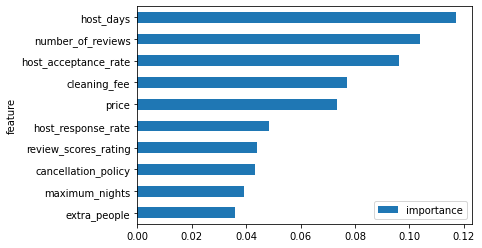

In [57]:
importances = best_clf.feature_importances_ 
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=True)[-10:].plot(x='feature', y='importance', kind='barh')

# **Discussion**

The Book rate model above indicates top 10 customer preferences that AirBnB customers evaluate when choosing the homestay among the listings. In general, they prefer the following listings:

*   listings with high hosts credit
*   listings with good hosts communications
*   listings with high ratings, including the number of review, and the overall review score
*   listing with reasonable price

In summary, customers tend to choose the listing with more reviews and good rating score. They also prefer experienced hosts, and appreciate a smooth communication with the host. Last but not least, price is the key factor that finalizes their decisions.

In order to improve the competitiveness, Airbnb should always improve its marketing decisions, from the abovementioned analysis, It should advertise, recommend, and promote the listings which have the abovementioned preferences with price around 100-400 on August.